In [1]:
import numpy as np
import gymnasium as gym
from matplotlib import pyplot as plt
from DDQN import QNet

### Initialize environment

In [2]:
env = gym.make('LunarLander-v2')

### Set hyperparameters

In [3]:
n_episodes = 1000
max_steps = 1000
replay_buffer_size=10000
replay_batch_size=32
switch_every=64
epsilon=0.05
decay=0.999
discount=0.99
burn_in=64
min_epsilon = 0.005

### Instantiate and train the model

In [4]:
model = QNet(env, replay_buffer_size, replay_batch_size, switch_every, epsilon, decay, discount, burn_in, min_epsilon)

rewards = model.train(n_episodes, max_steps, verbose=True)

burning in buffer...


/Users/felipemautner/Library/CloudStorage/GoogleDrive-fmautner@andrew.cmu.edu/My Drive/pessoais/rlcomp/DDQN.py:101: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  states = torch.tensor(states, dtype=torch.float32)


Episode 000 --- reward = -488.8022219928881
Episode 025 --- reward = -76.56682092807628
Episode 050 --- reward = -87.62416771175121
Episode 075 --- reward = -98.5284700667354
Episode 100 --- reward = -102.95398911597763
Episode 125 --- reward = -26.115359698462072
Episode 150 --- reward = -47.391503544992744
Episode 175 --- reward = 7.303290119447818
Episode 200 --- reward = -61.09758431208219
Episode 225 --- reward = -95.01050608204902
Episode 250 --- reward = -58.92822809276258
Episode 275 --- reward = -198.0366960203229
Episode 300 --- reward = -7.5892929615394396
Episode 325 --- reward = -85.96870853813513
Episode 350 --- reward = 238.6472496729236
Episode 375 --- reward = 228.17025540920326
Episode 400 --- reward = -158.4402658874605
Episode 425 --- reward = -198.4502967910853
Episode 450 --- reward = 242.22259037756427
Episode 475 --- reward = 268.8793102419423
Episode 500 --- reward = 238.4755188694047
Episode 525 --- reward = 272.5966066235994
Episode 550 --- reward = 236.14545

### Plot training rewards

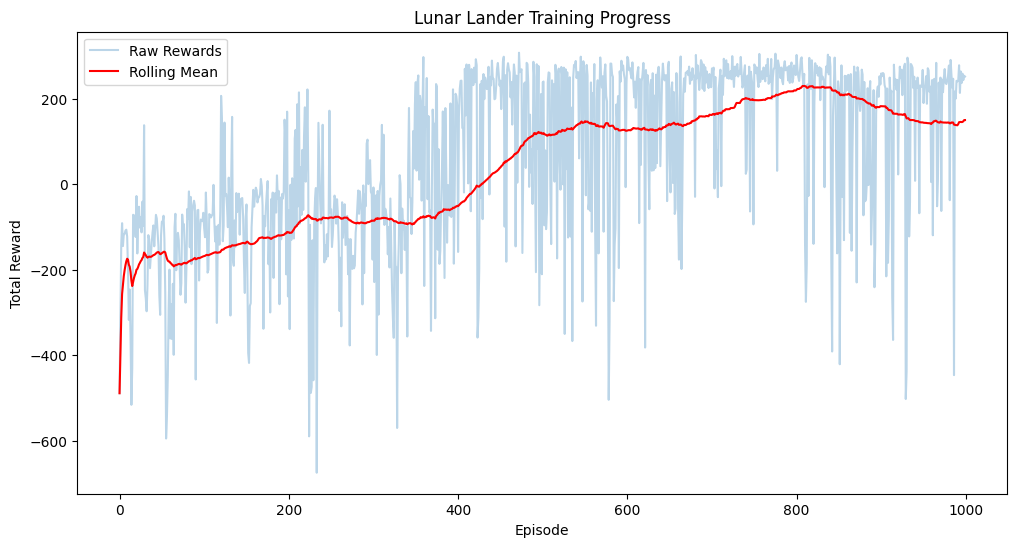

In [7]:
# Calculate rolling mean of last 100 episodes
scores = [np.mean(rewards[max(0, i-149):i+1]) for i in range(len(rewards))]
plt.figure(figsize=(12, 6))
plt.plot(rewards, alpha=0.3, label='Raw Rewards')
plt.plot(scores, color='red', label='Rolling Mean')
plt.title('Lunar Lander Training Progress')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.show()

### Saving video of trained model in action

In [6]:
from gymnasium.wrappers import RecordVideo

# Create a wrapped environment for video recording
env = gym.make('LunarLander-v2', render_mode='rgb_array')
video_env = RecordVideo(env, video_folder="videos", episode_trigger=lambda x: True)

# Reset the environment and get initial state
state = video_env.reset()[0]
done = False
total_reward = 0

# Run one episode
while not done:
    # Get action from the trained model
    action = model.get_action(state)
    
    # Take a step in the environment
    state, reward, done, _, _ = video_env.step(action)
    
    total_reward += reward

# Close the environment
video_env.close()

print(f"Episode finished with total reward: {total_reward}")
print("Video saved in ./videos directory")


/Users/felipemautner/opt/anaconda3/envs/301ML/lib/python3.9/site-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /Users/felipemautner/Library/CloudStorage/GoogleDrive-fmautner@andrew.cmu.edu/My Drive/pessoais/rlcomp/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /Users/felipemautner/Library/CloudStorage/GoogleDrive-fmautner@andrew.cmu.edu/My Drive/pessoais/rlcomp/videos/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/felipemautner/Library/CloudStorage/GoogleDrive-fmautner@andrew.cmu.edu/My Drive/pessoais/rlcomp/videos/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/felipemautner/Library/CloudStorage/GoogleDrive-fmautner@andrew.cmu.edu/My Drive/pessoais/rlcomp/videos/rl-video-episode-0.mp4
Episode finished with total reward: 267.10776548945285
Video saved in ./videos directory
